In [5]:
# Some hack that I need later

from sage.misc.latex import _Latex_prefs
from sage.misc.latex import png
from sage.misc.temporary_file import tmp_filename
import os
from IPython.display import Image
from IPython.display import display

def viewLatex(objects):
    engine = _Latex_prefs._option["engine"]
    if type(objects) != list:
        objects = [objects]
    L = []
    for o in objects:
        file_name = tmp_filename() + ".png"
        png(o, file_name, debug = False, engine = engine)
        L.append(Image(filename = file_name))
    return display(*L)

## Permutohedron

In [36]:
Permu3 = Polyhedron(list(Permutations(3)))
Permu3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 6 vertices (use the .plot() method to plot)

In [37]:
Permu3.plot()

Graphics3d Object

In [34]:
Permu4 = Polyhedron(list(Permutations(4)))
Permu4

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 24 vertices (use the .plot() method to plot)

In [35]:
Permu4.plot()

Graphics3d Object

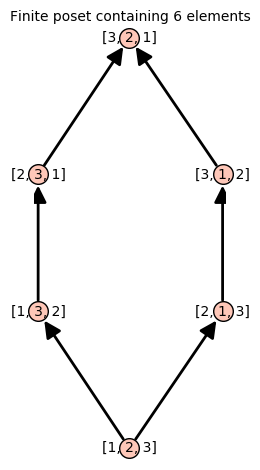

In [7]:
P3 = Permutations(3)
W3 = Poset((P3, lambda x,y: x.permutohedron_lequal(y, side="left")))
W3

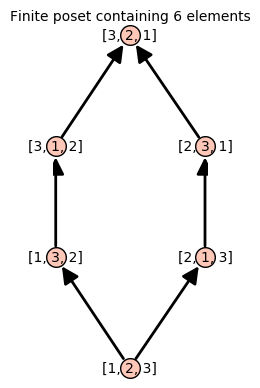

In [8]:
W3_right = Poset((P3, lambda x,y: x.permutohedron_lequal(y, side="right")))
W3_right

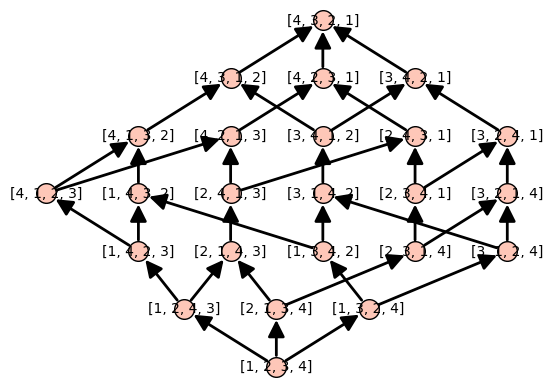

In [11]:
P4 = Permutations(4)
W4 = Poset((P4, lambda x,y: x.permutohedron_lequal(y, side="right")))
W4.plot()

## Binary Trees

In [12]:
BT8 = BinaryTrees(8)

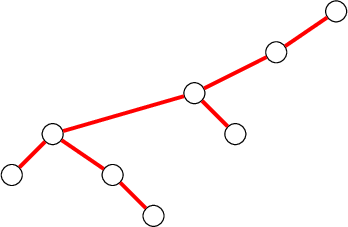

In [14]:
bt = BT8.random_element()
viewLatex(bt)

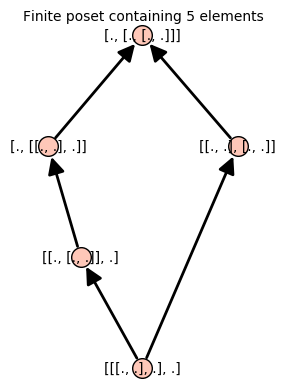

In [15]:
BT3 = list(BinaryTrees(3))
Tam3 = Poset((BT3, lambda x,y: x.tamari_lequal(y)))
Tam3

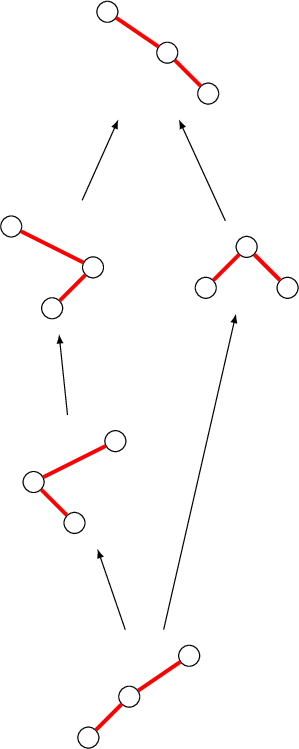

In [16]:
viewLatex(Tam3)

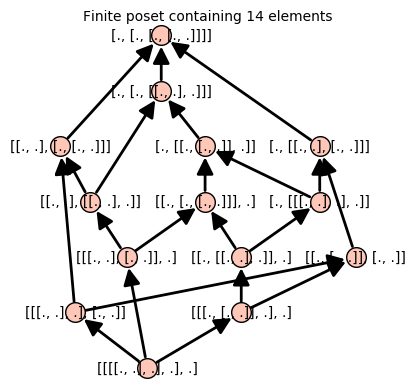

In [17]:
BT4 = list(BinaryTrees(4))
Tam4 = Poset((BT4, lambda x,y: x.tamari_lequal(y)))
Tam4

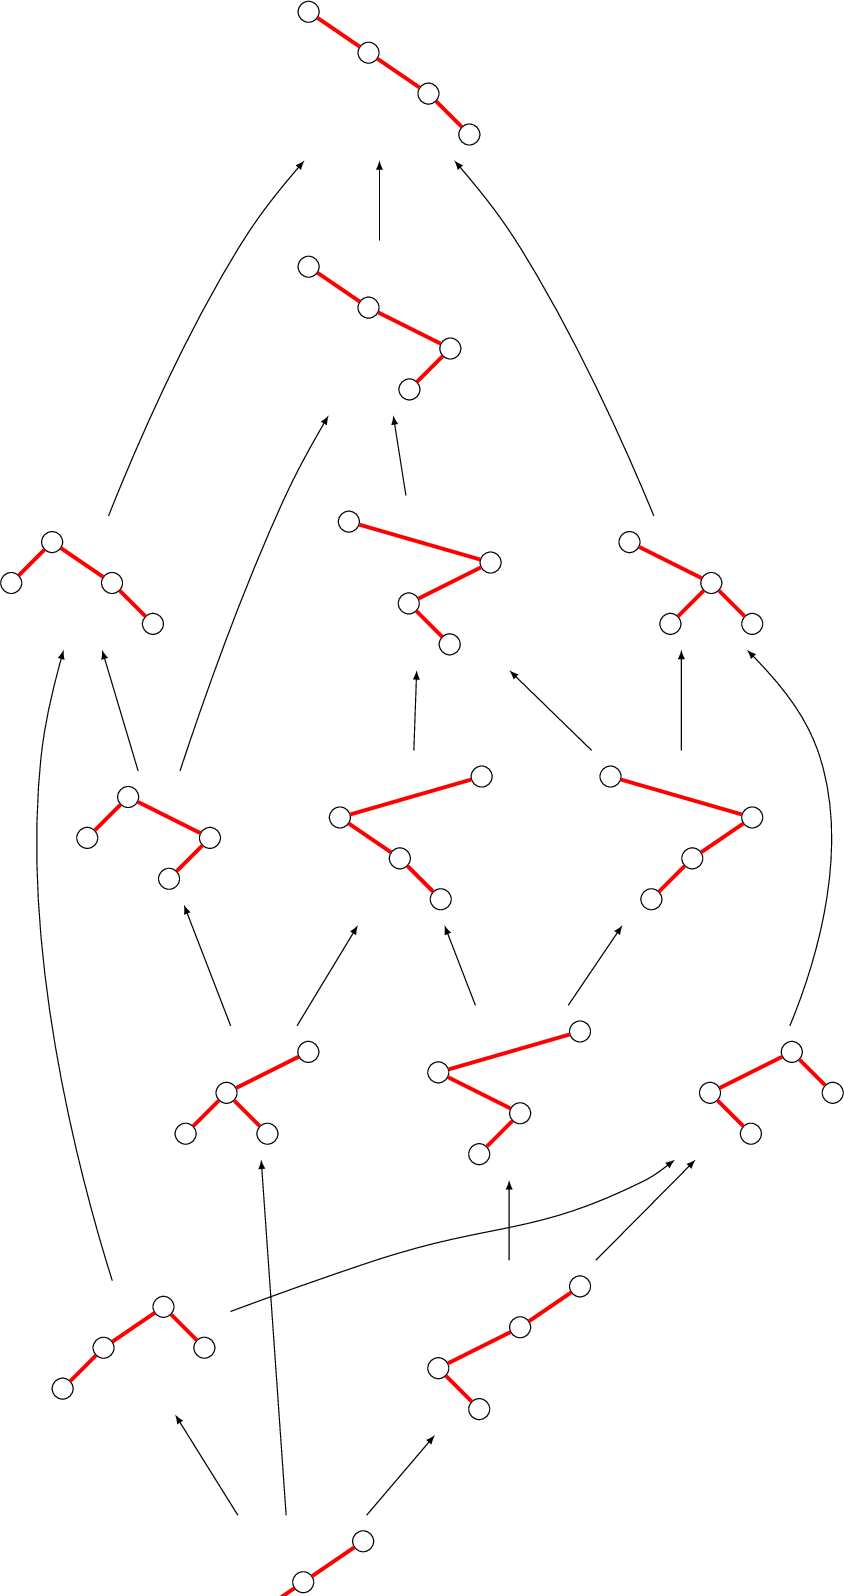

In [18]:
viewLatex(Tam4)

In [19]:
def numberOfLeaves(bt):
    if bt.node_number() == 0:
        return 1
    return numberOfLeaves(bt[0]) + numberOfLeaves(bt[1])

def LodayCoordinatesGen(bt):
    if bt.node_number() == 0:
        return
    yield from LodayCoordinates(bt[0])
    yield numberOfLeaves(bt[0])*numberOfLeaves(bt[1])
    yield from LodayCoordinates(bt[1])

def LodayCoordinates(bt):
    return tuple(LodayCoordinatesGen(bt))

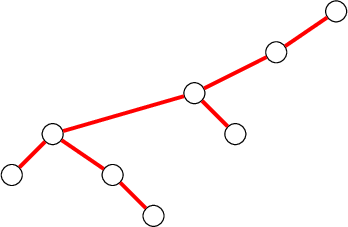

In [21]:
viewLatex(bt)

In [20]:
LodayCoordinates(bt)

(1, 6, 2, 1, 10, 1, 7, 8)

In [22]:
Asso3 = Polyhedron([LodayCoordinates(bt) for bt in BT3])
Asso3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 5 vertices (use the .plot() method to plot)

In [23]:
Asso3.plot()

Graphics3d Object

In [38]:
Asso4 = Polyhedron([LodayCoordinates(bt) for bt in BT4])
Asso4.plot()

Graphics3d Object

In [39]:
matrix = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1], [-ZZ(1)/3, -ZZ(1)/3, -ZZ(1)/3]])
proj = lambda x: list(Matrix(x)*matrix)[0]
Permu4Proj = Permu4.projection(proj)
Asso4Proj = Asso4.projection(proj)

In [40]:
Asso4Proj.plot()

Graphics3d Object

In [41]:
Permu4Proj.plot() + Asso4Proj.plot()

Graphics3d Object